In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

In [2]:
df= pd.read_csv('f2.csv')

In [3]:
df

Temparature  Humidity  Moisture Soil_Type    Crop_Type  Nitrogen  \
0             20        83        26    Clayey         rice        90   
1             25        84        32     Loamy         rice        66   
2             33        64        50     Loamy        Wheat        41   
3             34        65        54     Loamy        Wheat        38   
4             38        72        51     Loamy        Wheat        39   
..           ...       ...       ...       ...          ...       ...   
547           12        95        42     Sandy       orange        11   
548           12        95        42     Sandy       orange        11   
549           27        80        31    Clayey  kidneybeans        19   
550           27        80        31    Clayey  kidneybeans        19   
551           27        80        31    Clayey  kidneybeans        19   

     Potassium  Phosphorous Fertilizer  
0           49           36       Urea  
1           59           36       Urea  
2            0            0       Urea  
3            0            0       Urea  
4            0            0       Urea  
..         ...          ...        ...  
547         14            5   10-10-10  
548         14            5   10-10-10  
549         21            6   10-10-10  
550         21            6   10-10-10  
551         21            6   10-10-10  

[552 rows x 9 columns]

In [4]:
df.describe()

Temparature    Humidity    Moisture    Nitrogen   Potassium  \
count   552.000000  552.000000  552.000000  552.000000  552.000000   
mean     28.630435   64.557971   42.840580   28.521739   10.144928   
std       5.088082   11.880236   11.507275   29.121989   13.456956   
min       0.000000   50.000000   25.000000    0.000000    0.000000   
25%      26.000000   54.000000   33.000000   10.000000    0.000000   
50%      29.000000   62.000000   41.000000   15.000000    0.000000   
75%      32.000000   68.000000   51.000000   37.000000   18.000000   
max      38.000000   95.000000   65.000000  126.000000   59.000000   

       Phosphorous  
count   552.000000  
mean     21.115942  
std      14.920514  
min       0.000000  
25%       8.000000  
50%      20.000000  
75%      36.000000  
max      54.000000

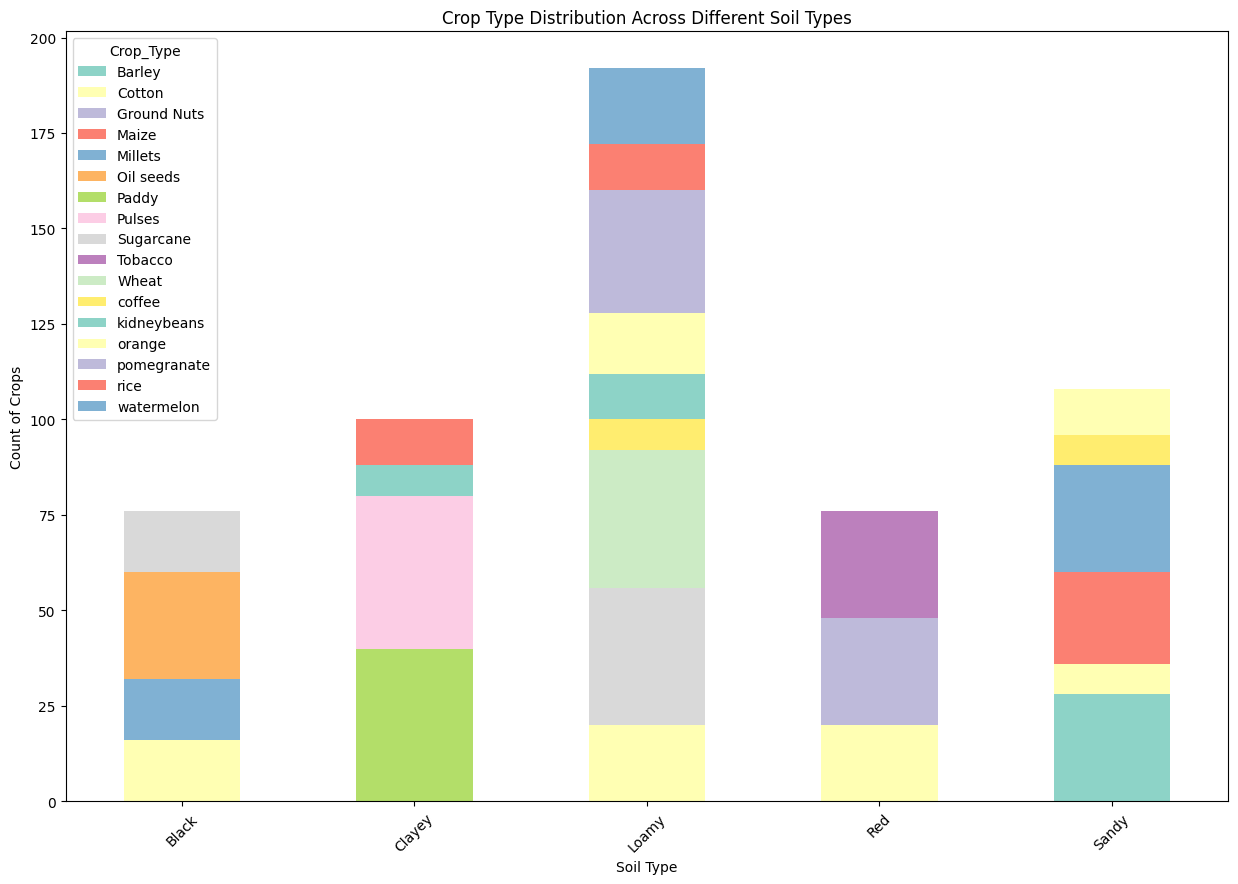

In [5]:
soil_crop_dist = pd.crosstab(df['Soil_Type'], df['Crop_Type'])
soil_crop_dist.plot(kind='bar', stacked=True, figsize=(15, 10), color=sns.color_palette("Set3"))
plt.title("Crop Type Distribution Across Different Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of Crops")
plt.xticks(rotation=45)
plt.show()

In [6]:
df.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [7]:
df['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

C:\Users\gagan\AppData\Local\Temp\ipykernel_3120\229670343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fertilizer", palette="Set2")


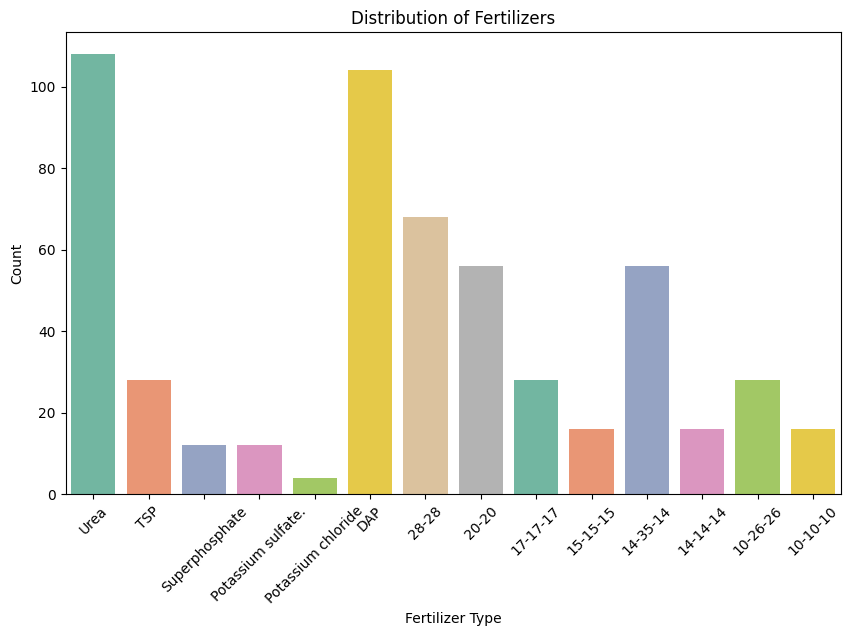

In [8]:
# Visualization 1: Fertilizer Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Fertilizer", palette="Set2")
plt.title("Distribution of Fertilizers")
plt.xlabel("Fertilizer Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\gagan\AppData\Local\Temp\ipykernel_3120\1073076683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Soil_Type", palette="viridis")


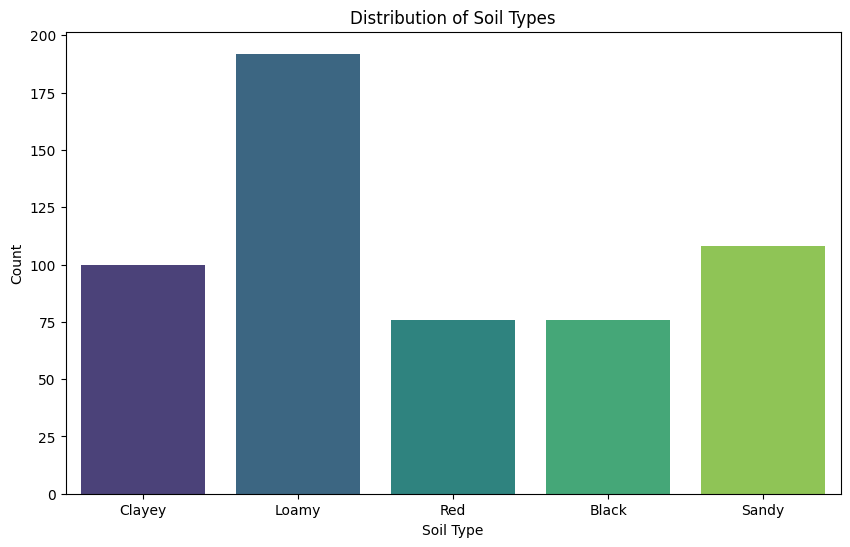

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Soil_Type", palette="viridis")
plt.title("Distribution of Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

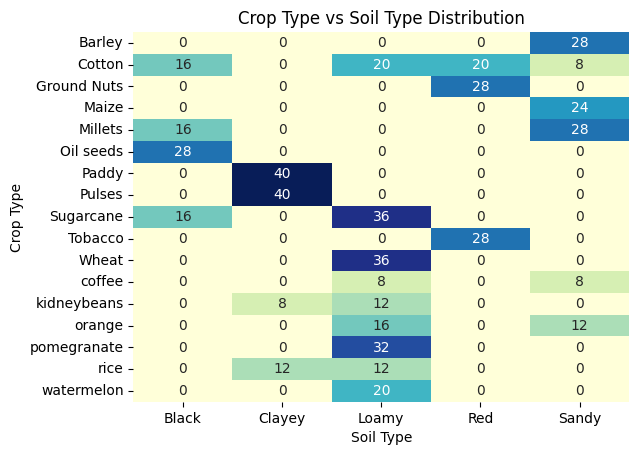

In [10]:
crop_soil_dist = pd.crosstab(df['Crop_Type'], df['Soil_Type'])
sns.heatmap(crop_soil_dist, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Crop Type vs Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Crop Type")
plt.show()

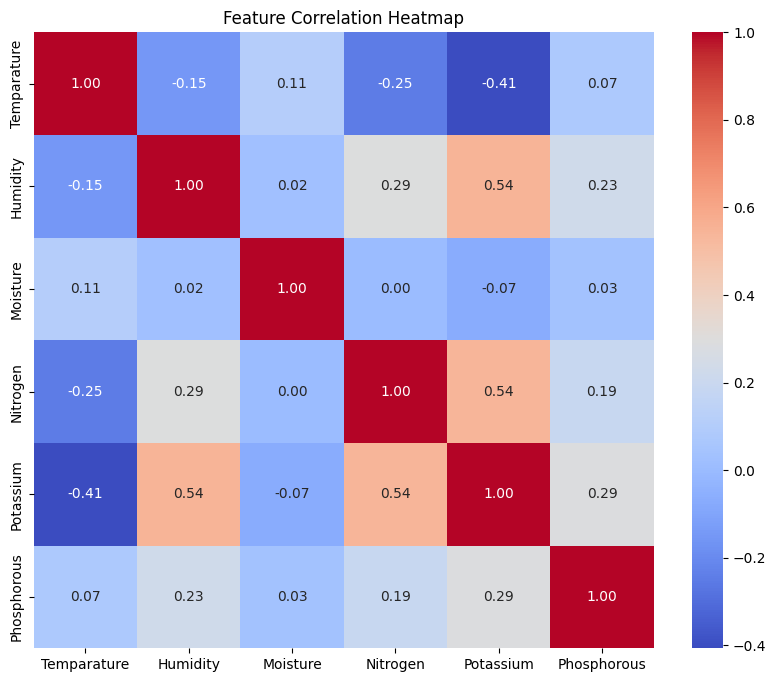

In [11]:
plt.figure(figsize=(10, 8))
correlation = df.select_dtypes(include=['int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
df

Temparature  Humidity  Moisture Soil_Type    Crop_Type  Nitrogen  \
0             20        83        26    Clayey         rice        90   
1             25        84        32     Loamy         rice        66   
2             33        64        50     Loamy        Wheat        41   
3             34        65        54     Loamy        Wheat        38   
4             38        72        51     Loamy        Wheat        39   
..           ...       ...       ...       ...          ...       ...   
547           12        95        42     Sandy       orange        11   
548           12        95        42     Sandy       orange        11   
549           27        80        31    Clayey  kidneybeans        19   
550           27        80        31    Clayey  kidneybeans        19   
551           27        80        31    Clayey  kidneybeans        19   

     Potassium  Phosphorous Fertilizer  
0           49           36       Urea  
1           59           36       Urea  
2            0            0       Urea  
3            0            0       Urea  
4            0            0       Urea  
..         ...          ...        ...  
547         14            5   10-10-10  
548         14            5   10-10-10  
549         21            6   10-10-10  
550         21            6   10-10-10  
551         21            6   10-10-10  

[552 rows x 9 columns]

In [13]:
df['Soil_Type'].unique()

array(['Clayey', 'Loamy', 'Red', 'Black', 'Sandy'], dtype=object)

In [14]:
df['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [15]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Fertilizer']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(label_encoders)

{'Soil_Type': LabelEncoder(), 'Crop_Type': LabelEncoder()}


In [16]:
df['Soil_Type'].unique()

array([1, 2, 3, 0, 4])

In [17]:
df['Crop_Type'].unique()

array([15, 10,  9,  8,  7, 14,  6,  5,  4,  3,  2,  1, 11, 16,  0, 12, 13])

In [18]:
df['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [19]:

scaler = StandardScaler()
# Exclude 'Fertilizer' column while fitting the scaler
numerical_cols = [col for col in df.columns if col != 'Fertilizer']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols])

     Temparature  Humidity  Moisture  Soil_Type  Crop_Type  Nitrogen  \
0      -1.697744  1.553737 -1.464800  -0.835692   1.658679  2.112975   
1      -0.714164  1.637986 -0.942918  -0.056466   1.658679  1.288108   
2       0.859563 -0.047009  0.622729  -0.056466   0.597985  0.428871   
3       1.056279  0.037241  0.970651  -0.056466   0.597985  0.325763   
4       1.843143  0.626989  0.709709  -0.056466   0.597985  0.360132   
..           ...       ...       ...        ...        ...       ...   
547    -3.271472  2.564734 -0.073114   1.501986   1.234402 -0.602213   
548    -3.271472  2.564734 -0.073114   1.501986   1.234402 -0.602213   
549    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   
550    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   
551    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   

     Potassium  Phosphorous  
0     2.889979     0.998461  
1     3.633763     0.998461  
2    -0.754564    -1.416513  
3    -0.754564 

In [20]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [21]:
df['Crop_Type'].unique()

array([ 1.65867947,  0.59798546,  0.38584666,  0.17370786, -0.03843094,
        1.44654067, -0.25056974, -0.46270855, -0.67484735, -0.88698615,
       -1.09912495, -1.31126375,  0.81012426,  1.87081827, -1.52340255,
        1.02226307,  1.23440187])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
X= df.drop(columns=['Fertilizer'])
y=df['Fertilizer']

In [24]:
X

Temparature  Humidity  Moisture  Soil_Type  Crop_Type  Nitrogen  \
0      -1.697744  1.553737 -1.464800  -0.835692   1.658679  2.112975   
1      -0.714164  1.637986 -0.942918  -0.056466   1.658679  1.288108   
2       0.859563 -0.047009  0.622729  -0.056466   0.597985  0.428871   
3       1.056279  0.037241  0.970651  -0.056466   0.597985  0.325763   
4       1.843143  0.626989  0.709709  -0.056466   0.597985  0.360132   
..           ...       ...       ...        ...        ...       ...   
547    -3.271472  2.564734 -0.073114   1.501986   1.234402 -0.602213   
548    -3.271472  2.564734 -0.073114   1.501986   1.234402 -0.602213   
549    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   
550    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   
551    -0.320733  1.300987 -1.029898  -0.835692   1.022263 -0.327257   

     Potassium  Phosphorous  
0     2.889979     0.998461  
1     3.633763     0.998461  
2    -0.754564    -1.416513  
3    -0.754564    -1.416513  
4    -0.754564    -1.416513  
..         ...          ...  
547   0.286734    -1.081099  
548   0.286734    -1.081099  
549   0.807383    -1.014017  
550   0.807383    -1.014017  
551   0.807383    -1.014017  

[552 rows x 8 columns]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [30]:
print(accuracy)
print(conf_matrix)
print(class_report)

1.0
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 39]]
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         7
          10-26-26       1.00      1.00      1.00        10
          14-14-14       1.00      1.00      1.00         7
          14-35-14       1.00      1.00      1.00        16
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         5
             20-20       1.0

In [31]:
with open('fertilizer_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv("f2.csv")

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Fertilizer"])
y = df["Fertilizer"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LIME for explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                   feature_names=X.columns,
                                                   class_names=label_encoders['Fertilizer'].classes_,
                                                   discretize_continuous=True)

# Explain a single prediction
idx = 0  # Index of test sample to explain
exp = explainer.explain_instance(X_test[idx], rf.predict_proba, num_features=5)
exp.show_in_notebook()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        24

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv("f2.csv")

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Fertilizer"])
y = df["Fertilizer"]

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model with regularization to prevent overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LIME for explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                   feature_names=X.columns,
                                                   class_names=label_encoders['Fertilizer'].classes_,
                                                   discretize_continuous=True)

# Explain a single prediction
idx = np.random.randint(0, len(X_test))  # Random index for better insight
exp = explainer.explain_instance(X_test[idx], rf.predict_proba, num_features=5)
exp.show_in_notebook()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        22

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv("f2.csv")

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Remove highly correlated features to reduce overfitting
correlation_matrix = df.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df = df.drop(columns=correlated_features)

# Define features and target
X = df.drop(columns=["Fertilizer"])
y = df["Fertilizer"]

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model with more randomness to prevent overfitting
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LIME for explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                   feature_names=X.columns,
                                                   class_names=label_encoders['Fertilizer'].classes_,
                                                   discretize_continuous=True)

# Explain a single prediction
idx = np.random.randint(0, len(X_test))  # Random index for better insight
exp = explainer.explain_instance(X_test[idx], rf.predict_proba, num_features=5)
exp.show_in_notebook()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        31
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        33

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv("f2.csv")

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Remove highly correlated features to reduce overfitting
correlation_matrix = df.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df = df.drop(columns=correlated_features)

# Define features and target
X = df.drop(columns=["Fertilizer"])
y = df["Fertilizer"]

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model with stronger regularization to reduce overfitting
rf = RandomForestClassifier(n_estimators=50, max_depth=7, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LIME for explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                   feature_names=X.columns,
                                                   class_names=label_encoders['Fertilizer'].classes_,
                                                   discretize_continuous=True)

# Explain a single prediction
idx = np.random.randint(0, len(X_test))  # Random index for better insight
exp = explainer.explain_instance(X_test[idx], rf.predict_proba, num_features=5)
exp.show_in_notebook()

Accuracy: 0.9698795180722891
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        20
           8       0.97      1.00      0.98        31
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         4
          11       0.80      1.00      0.89         4
          12       0.80      1.00      0.89         8
          13       1.00      0.97      0.98        33

    accuracy                           0.97       166
   macro avg       0.89      0.88      0.87       166
weighted avg       0.97      0.97      0.97       1

C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv("f2.csv")

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Remove highly correlated features to reduce overfitting
correlation_matrix = df.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df = df.drop(columns=correlated_features)

# Define features and target
X = df.drop(columns=["Fertilizer"])
y = df["Fertilizer"]

# Feature selection using feature importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)
feature_importances = pd.Series(rf_temp.feature_importances_, index=X.columns)
selected_features = feature_importances[feature_importances > 0.02].index
X = X[selected_features]

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model with optimized parameters
rf = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_split=8, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LIME for explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                   feature_names=X.columns,
                                                   class_names=label_encoders['Fertilizer'].classes_,
                                                   discretize_continuous=True)

# Explain a single prediction
idx = np.random.randint(0, len(X_test))  # Random index for better insight
exp = explainer.explain_instance(X_test[idx], rf.predict_proba, num_features=5)
exp.show_in_notebook()

Accuracy: 0.9939759036144579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        20
           8       0.97      1.00      0.98        31
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        33

    accuracy                           0.99       166
   macro avg       0.93      0.93      0.93       166
weighted avg       0.99      0.99      0.99       1

C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [26]:
import pickle
with open('fertilizer_model_1.pkl', 'wb') as file:
    pickle.dump(rf, file)